Import all necessary libraries

In [218]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,f1_score,ConfusionMatrixDisplay, roc_auc_score,roc_curve
from imblearn.over_sampling import SMOTE

Read the Dataset

In [219]:
autism_data = pd.read_csv('autism_screening.csv')
df = pd.DataFrame(autism_data)
df

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jaundice,autism,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,United States,no,6,18 and more,Self,NO
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5,18 and more,Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8,18 and more,Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,United States,no,6,18 and more,Self,NO
4,1,0,0,0,0,0,0,1,0,0,...,f,?,no,no,Egypt,no,2,18 and more,?,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,0,1,0,1,1,0,1,1,1,1,...,f,White-European,no,no,Russia,no,7,18 and more,Self,YES
700,1,0,0,0,0,0,0,1,0,1,...,m,Hispanic,no,no,Mexico,no,3,18 and more,Parent,NO
701,1,0,1,1,1,0,1,1,0,1,...,f,?,no,no,Russia,no,7,18 and more,?,YES
702,1,0,0,1,1,0,1,0,1,1,...,m,South Asian,no,no,Pakistan,no,6,18 and more,Self,NO


Shape of the data

In [220]:
print(df.shape)

(704, 21)


Datatypes of the columns

In [221]:
pd.DataFrame(df.dtypes)

,0
A1_Score,int64
A2_Score,int64
A3_Score,int64
A4_Score,int64
A5_Score,int64
A6_Score,int64
A7_Score,int64
A8_Score,int64
A9_Score,int64
A10_Score,int64


In [222]:
df.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result
count,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,702.000000,704.000000
mean,0.721591,0.453125,0.457386,0.495739,0.498580,0.284091,0.417614,0.649148,0.323864,0.573864,29.698006,4.875000
std,0.448535,0.498152,0.498535,0.500337,0.500353,0.451301,0.493516,0.477576,0.468281,0.494866,16.507465,2.501493
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,3.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,27.000000,4.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.000000,7.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,383.000000,10.000000


Checking for null values and dropping it

In [223]:
df.isna().sum()

A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                2
gender             0
ethnicity          0
jaundice           0
autism             0
contry_of_res      0
used_app_before    0
result             0
age_desc           0
relation           0
Class/ASD          0
dtype: int64

In [224]:
df1 = df.dropna(subset=['age']).copy()

In [225]:
df1.isnull().sum()

A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                0
gender             0
ethnicity          0
jaundice           0
autism             0
contry_of_res      0
used_app_before    0
result             0
age_desc           0
relation           0
Class/ASD          0
dtype: int64

Outliers

In [226]:
print(df1['age'].max())
print(df1['age'].min())

383.0
17.0


In [227]:
df1[df1['age'] == df1['age'].max()]

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jaundice,autism,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
52,1,0,0,0,0,0,0,0,0,0,...,f,Pasifika,no,no,New Zealand,no,1,18 and more,Self,NO


In [228]:
df1.drop(index = 52, inplace= True)
df1.reset_index(drop=True)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jaundice,autism,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,United States,no,6,18 and more,Self,NO
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5,18 and more,Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8,18 and more,Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,United States,no,6,18 and more,Self,NO
4,1,0,0,0,0,0,0,1,0,0,...,f,?,no,no,Egypt,no,2,18 and more,?,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
696,0,1,0,1,1,0,1,1,1,1,...,f,White-European,no,no,Russia,no,7,18 and more,Self,YES
697,1,0,0,0,0,0,0,1,0,1,...,m,Hispanic,no,no,Mexico,no,3,18 and more,Parent,NO
698,1,0,1,1,1,0,1,1,0,1,...,f,?,no,no,Russia,no,7,18 and more,?,YES
699,1,0,0,1,1,0,1,0,1,1,...,m,South Asian,no,no,Pakistan,no,6,18 and more,Self,NO


Duplicate values

In [229]:
df1.duplicated().sum()

5

In [230]:
df1 = df1.drop_duplicates()
df1 = df1.reset_index(drop=True)

In [231]:
df1.shape

(696, 21)

Exploratory Data Analysis

In [232]:
df1['ethnicity'] = df1['ethnicity'].replace('?','Others')
df1['ethnicity'] = df1['ethnicity'].replace('others','Others')
ethnicity_counts = df1['ethnicity'].value_counts()
print(ethnicity_counts)

ethnicity
White-European     230
Others             124
Asian              123
Middle Eastern      90
Black               43
South Asian         36
Latino              20
Hispanic            13
Pasifika            11
Turkish              6
Name: count, dtype: int64


In [233]:
df1['relation'] = df1['relation'].replace('?','Others')
df1['relation'].value_counts()

relation
Self                        518
Others                       98
Parent                       50
Relative                     26
Health care professional      4
Name: count, dtype: int64

In [234]:
df1.drop(['age_desc'],axis = 1, inplace = True)

In [235]:
df1.shape

(696, 20)

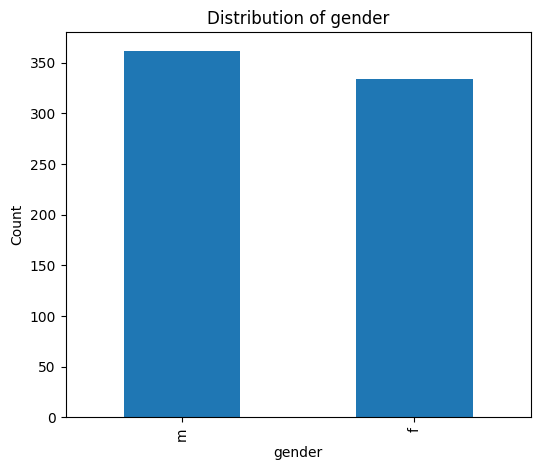

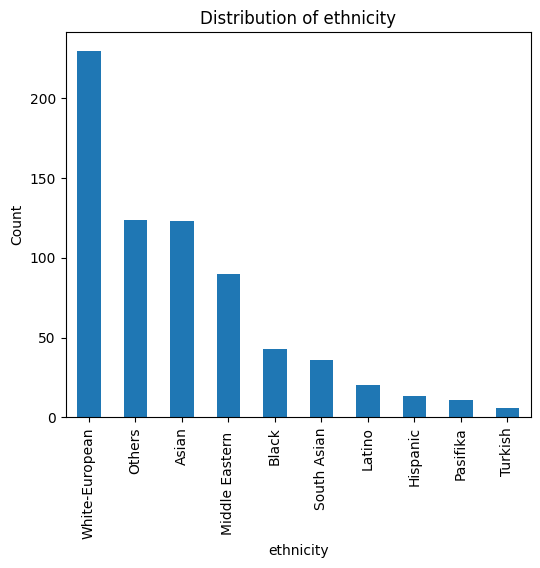

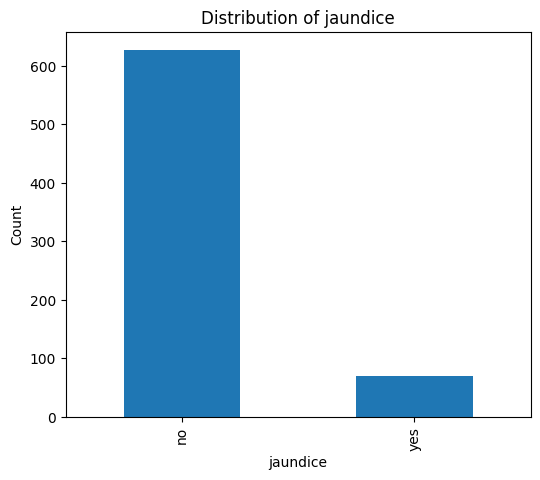

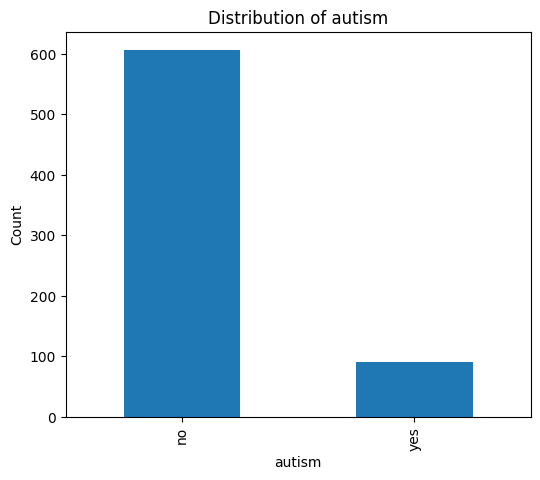

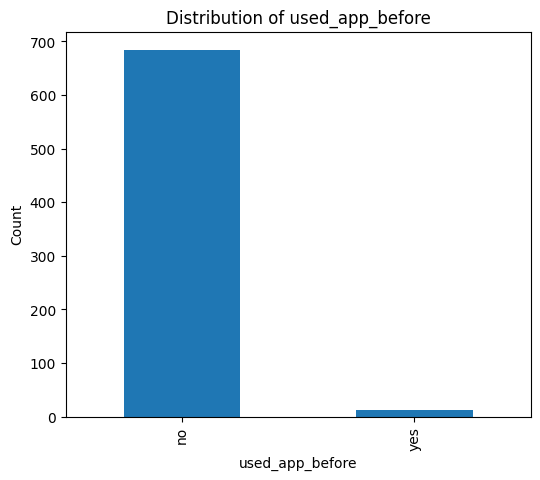

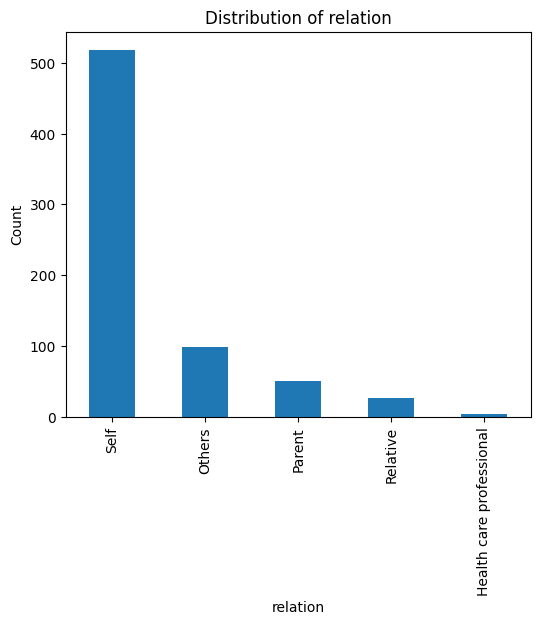

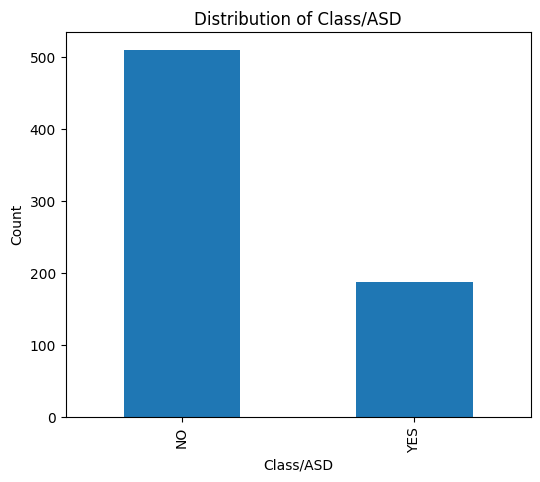

In [236]:
cat_col = ['gender','ethnicity','jaundice','autism','used_app_before','relation','Class/ASD']

for col in cat_col:
    df1[col] = df1[col].astype('category')

for col in cat_col:
    plt.figure(figsize=(6,5))
    df1[col].value_counts().plot(kind='bar')
    plt.ylabel('Count')
    plt.title(f'Distribution of {col}')
    plt.show()

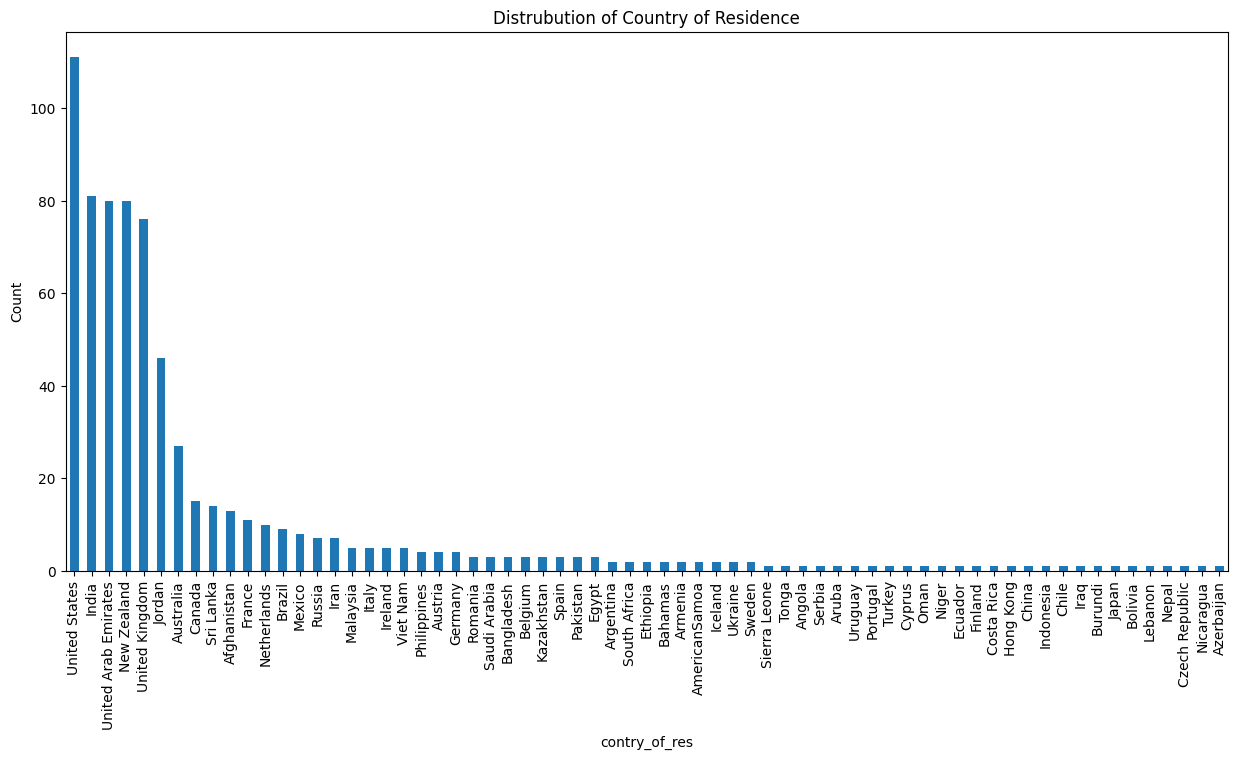

In [237]:
df1['contry_of_res'] = df1['contry_of_res'].astype('category')
plt.figure(figsize=(15,7))
df1['contry_of_res'].value_counts().plot(kind='bar')
plt.ylabel('Count')
plt.title('Distrubution of Country of Residence')
plt.show()

Visualization of Numerical variables

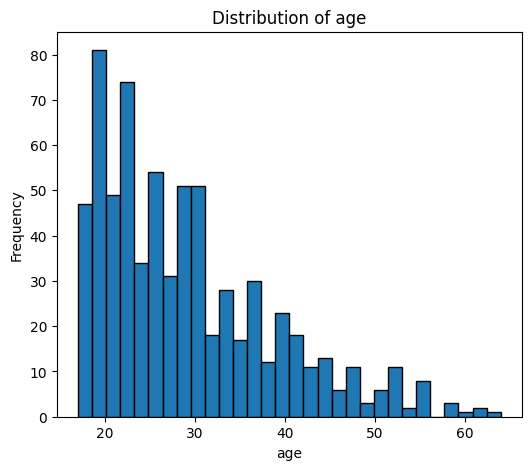

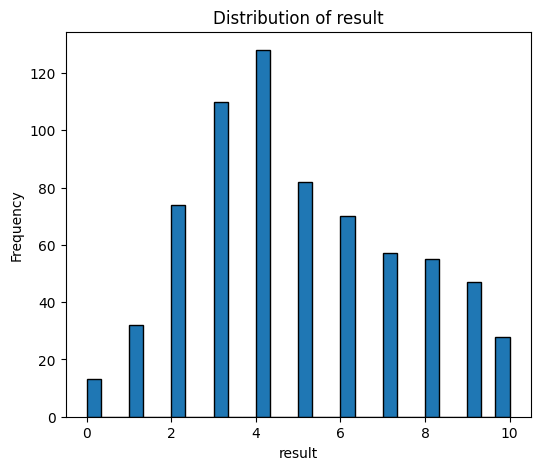

In [239]:
num_col=['age','result']

for col in num_col:
    plt.figure(figsize=(6,5))
    df1[col].plot(kind='hist', bins=30, edgecolor='black')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {col}')
    plt.show()

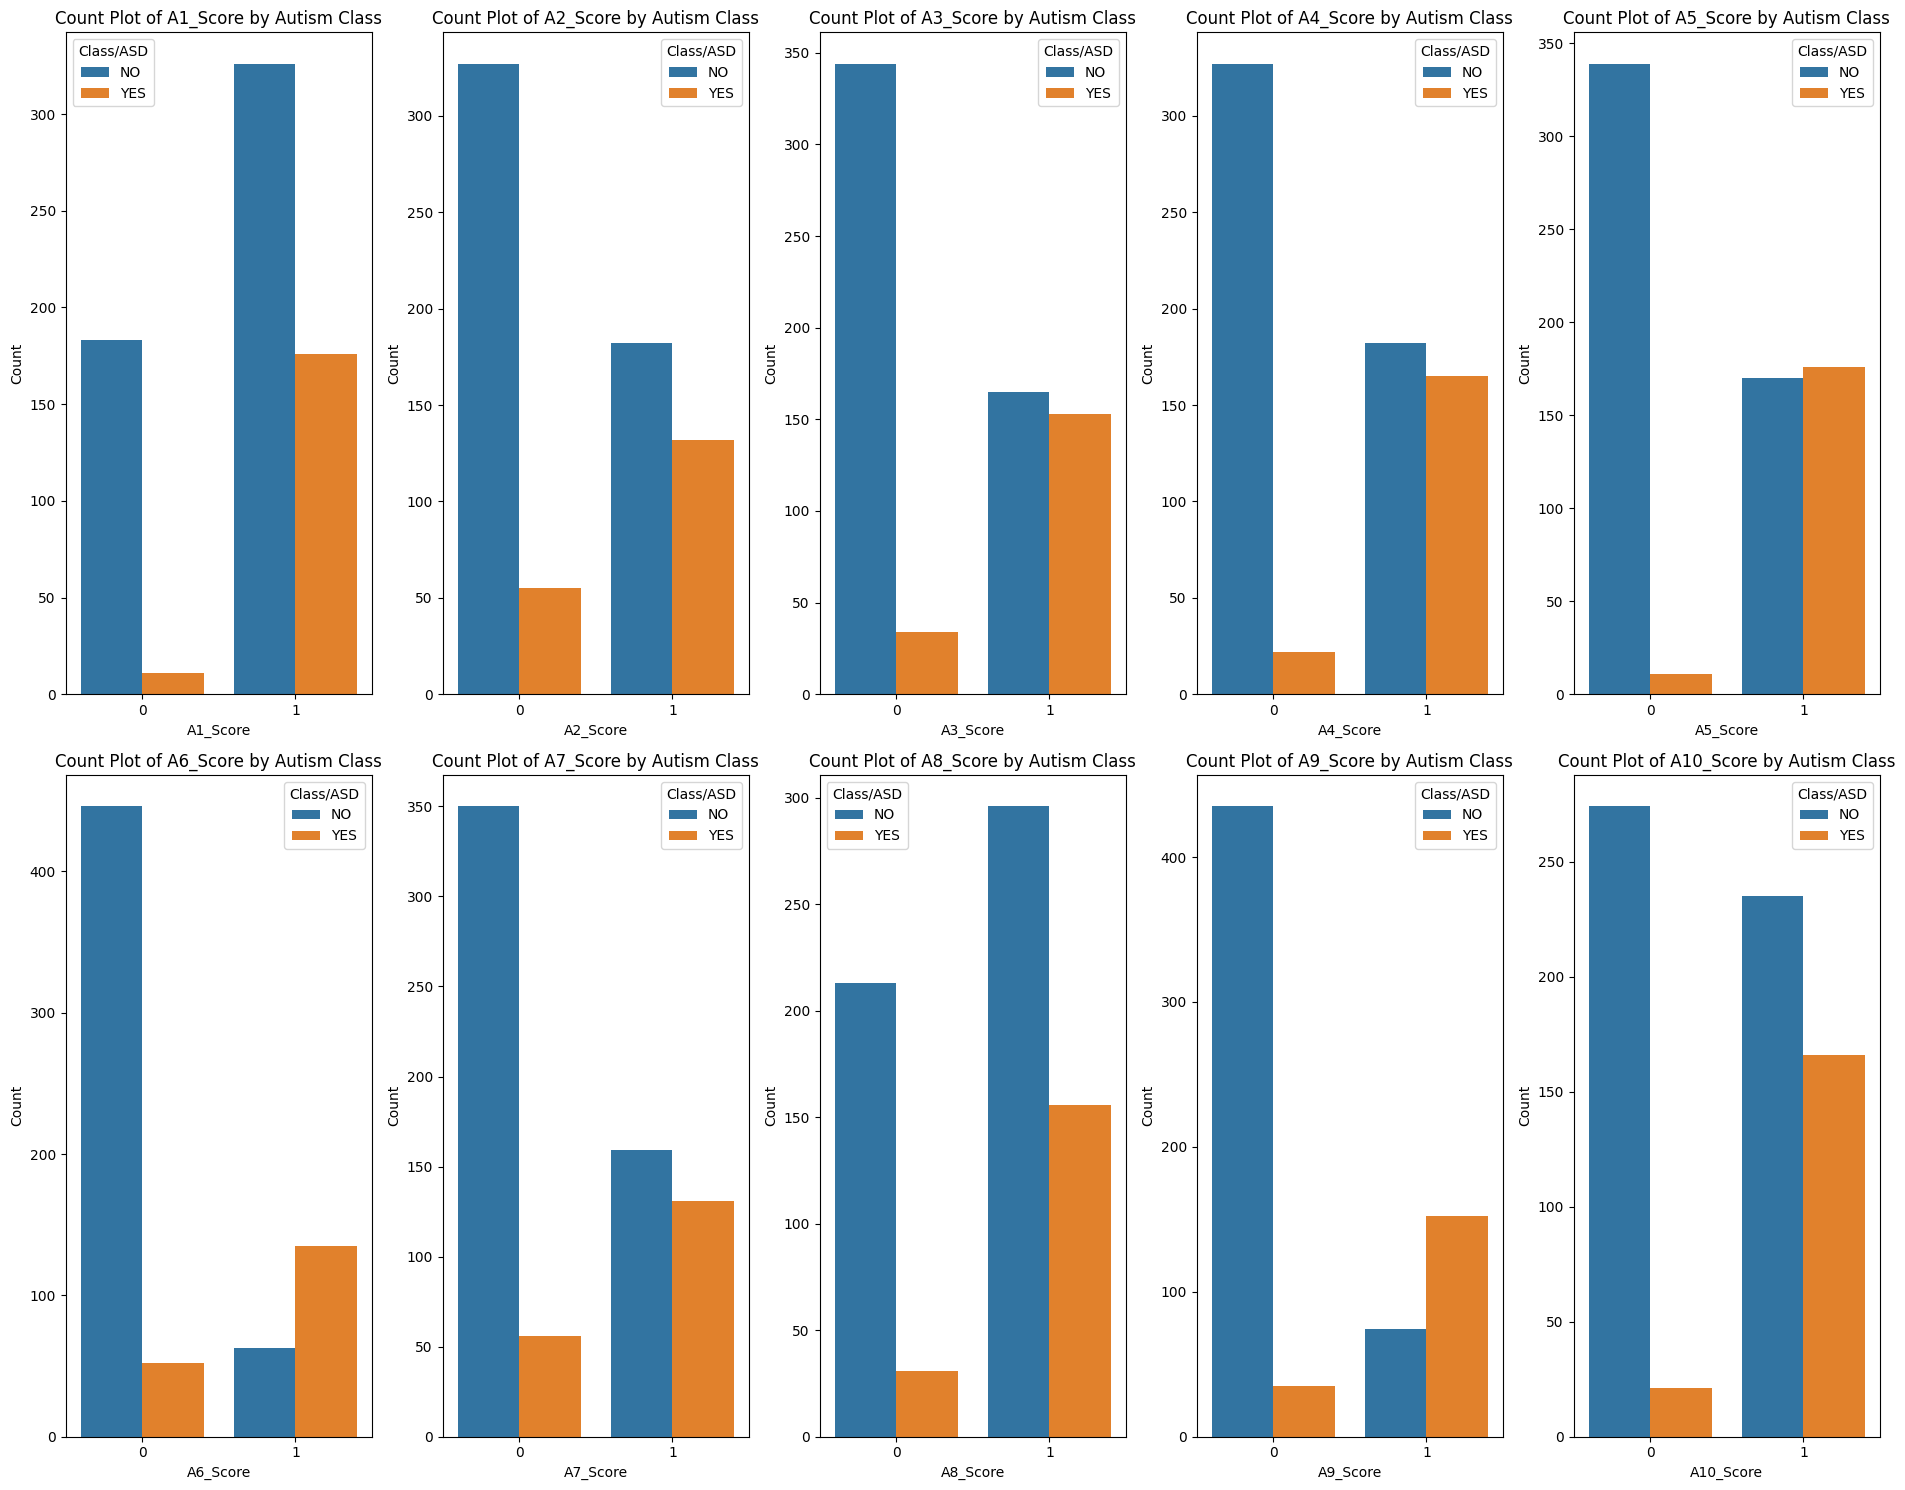

In [240]:
df1['Class/ASD'] = df1['Class/ASD'].astype('category')

score_col = ['A1_Score','A2_Score','A3_Score','A4_Score','A5_Score','A6_Score','A7_Score','A8_Score','A9_Score','A10_Score']

plt.figure(figsize=(19, 15)) 

for i, column in enumerate(score_col, start=1):
    plt.subplot(2, 5, i)  # Create subplot in a 2-row, 5-column grid
    sns.countplot(x=column, hue='Class/ASD', data=df1)
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.title(f'Count Plot of {column} by Autism Class')

plt.tight_layout()
plt.show()

Categorizing age into groups 

C:\Users\hemam\AppData\Local\Temp\ipykernel_11052\1176039013.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = df1.groupby(['age_category', 'Class/ASD']).size().unstack(fill_value=0)


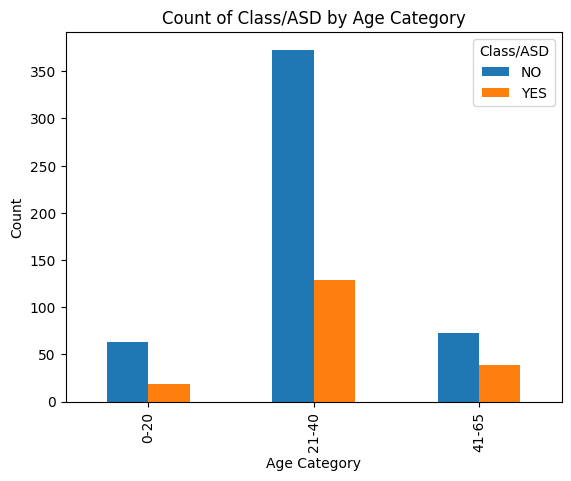

In [241]:
bins = [0, 20, 40, 65]
labels = ['0-20', '21-40', '41-65']
df1['age_category'] = pd.cut(df1['age'], bins=bins, labels=labels, right=False)


count_data = df1.groupby(['age_category', 'Class/ASD']).size().unstack(fill_value=0)

count_data.plot(kind='bar', stacked=False)
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.title('Count of Class/ASD by Age Category')
plt.legend(title='Class/ASD')
plt.show()

In [242]:
df1.drop(['result','age_category'],axis = 1, inplace = True)
df1

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,autism,contry_of_res,used_app_before,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,26.0,f,White-European,no,no,United States,no,Self,NO
1,1,1,0,1,0,0,0,1,0,1,24.0,m,Latino,no,yes,Brazil,no,Self,NO
2,1,1,0,1,1,0,1,1,1,1,27.0,m,Latino,yes,yes,Spain,no,Parent,YES
3,1,1,0,1,0,0,1,1,0,1,35.0,f,White-European,no,yes,United States,no,Self,NO
4,1,0,0,0,0,0,0,1,0,0,40.0,f,Others,no,no,Egypt,no,Others,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691,0,1,0,1,1,0,1,1,1,1,25.0,f,White-European,no,no,Russia,no,Self,YES
692,1,0,0,0,0,0,0,1,0,1,34.0,m,Hispanic,no,no,Mexico,no,Parent,NO
693,1,0,1,1,1,0,1,1,0,1,24.0,f,Others,no,no,Russia,no,Others,YES
694,1,0,0,1,1,0,1,0,1,1,35.0,m,South Asian,no,no,Pakistan,no,Self,NO


Encoding the Categorical columns

In [243]:
label_encoder = LabelEncoder()
df1['gender'] = label_encoder.fit_transform(df1['gender'])
df1['jaundice'] = label_encoder.fit_transform(df1['jaundice'])
df1['autism'] = label_encoder.fit_transform(df1['autism'])
df1['used_app_before'] = label_encoder.fit_transform(df1['used_app_before'])
df1['Class/ASD'] = label_encoder.fit_transform(df1['Class/ASD'])

In [244]:
df1 = pd.get_dummies(df1, columns=['ethnicity', 'relation', 'contry_of_res'])
df1

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,contry_of_res_Sri Lanka,contry_of_res_Sweden,contry_of_res_Tonga,contry_of_res_Turkey,contry_of_res_Ukraine,contry_of_res_United Arab Emirates,contry_of_res_United Kingdom,contry_of_res_United States,contry_of_res_Uruguay,contry_of_res_Viet Nam
0,1,1,1,1,0,0,1,1,0,0,...,False,False,False,False,False,False,False,True,False,False
1,1,1,0,1,0,0,0,1,0,1,...,False,False,False,False,False,False,False,False,False,False
2,1,1,0,1,1,0,1,1,1,1,...,False,False,False,False,False,False,False,False,False,False
3,1,1,0,1,0,0,1,1,0,1,...,False,False,False,False,False,False,False,True,False,False
4,1,0,0,0,0,0,0,1,0,0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691,0,1,0,1,1,0,1,1,1,1,...,False,False,False,False,False,False,False,False,False,False
692,1,0,0,0,0,0,0,1,0,1,...,False,False,False,False,False,False,False,False,False,False
693,1,0,1,1,1,0,1,1,0,1,...,False,False,False,False,False,False,False,False,False,False
694,1,0,0,1,1,0,1,0,1,1,...,False,False,False,False,False,False,False,False,False,False


Correlation Heatmap

In [245]:
filtered_columns1 = ['A1_Score','A2_Score','A3_Score','A4_Score','A5_Score','A6_Score','A7_Score','A8_Score','A9_Score','A10_Score','age','autism','jaundice','Class/ASD']
df3 = df1[filtered_columns1]

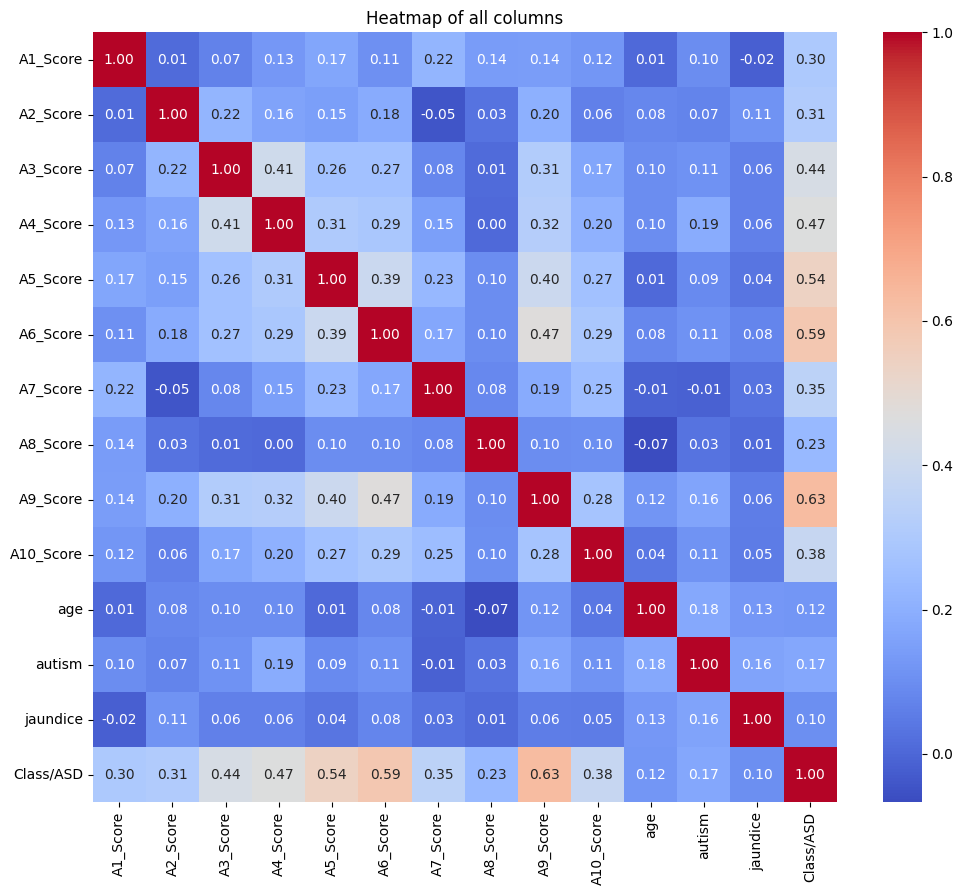

In [246]:
heatmap_data = df3.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Correlation Matrix for Categorical Data')
plt.title('Heatmap of all columns')
plt.xticks(rotation=90)
plt.show()

In [247]:
X = df1.drop('Class/ASD', axis = 1)
y = df1['Class/ASD']

X_train, X_test ,y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)


PCA

In [248]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Percentage of variance explained by the first 12 PCs: 38.08%


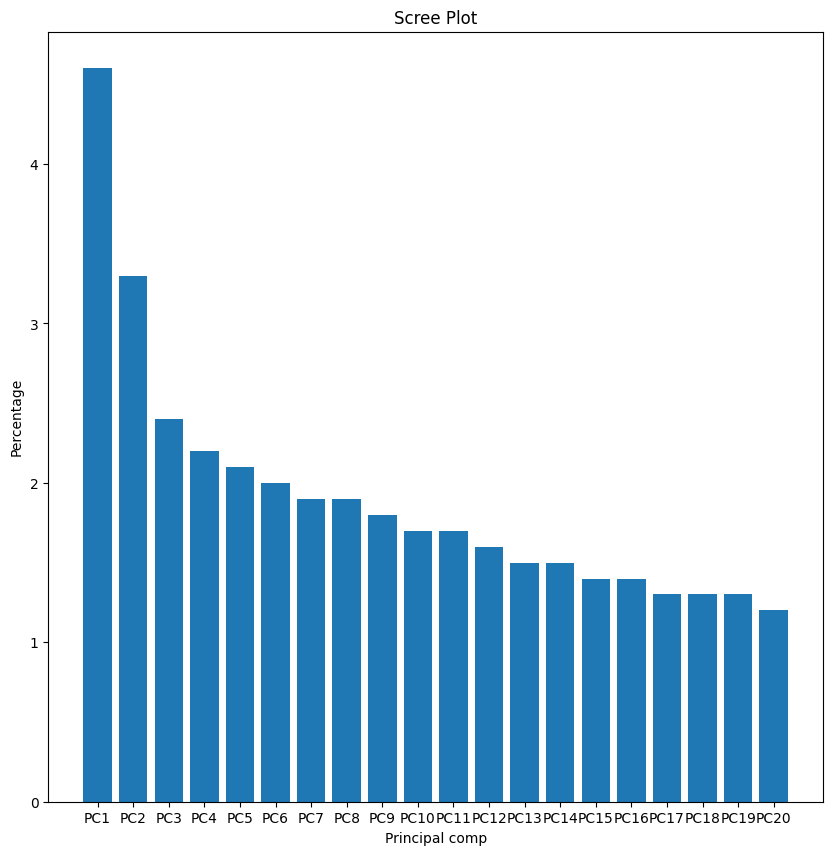

In [271]:
pca = PCA(n_components=20,random_state=42)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)


# Explained variance ratio
explained_variance = pca.explained_variance_ratio_

cumulative_variance_ratio = explained_variance.cumsum()

percentage_variance_explained = cumulative_variance_ratio[-1] * 100
print(f"Percentage of variance explained by the first 12 PCs: {percentage_variance_explained:.2f}%")


# Multiply explained by 100 and round
per_var = np.round(explained_variance * 100, decimals=1)
# Create labels for barplot
labels = ['PC' + str(x) for x in range(1, len(per_var) + 1)]
plt.figure(figsize=(10, 10))
plt.bar(x=range(1, len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage')
plt.xlabel('Principal comp')
plt.title('Scree Plot')
plt.show()

SMOTE

In [272]:
from imblearn.pipeline import Pipeline

smote = SMOTE(random_state=42)

Logistic Regression

In [251]:
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

lg_model = LogisticRegression(solver='liblinear', penalty='l1', max_iter=1000)

lg_param_grid = {
    'lg__C': [0.1, 10, 100, 200, 500],
    'lg__penalty': ['l1', 'l2']
}

lg_pipeline = Pipeline([
    ('smote', smote),
    ('lg', lg_model)
])


lg_pipeline.fit(X_train_pca,y_train)


lg_y_pred_train = lg_pipeline.predict(X_train_pca)
lg_y_pred_test = lg_pipeline.predict(X_test_pca)

print('Training accuracy score :',accuracy_score(y_train, lg_y_pred_train))
print('Training F1 score:',f1_score(y_train, lg_y_pred_train, average='macro'))


print('Testing accuracy score :',accuracy_score(y_test, lg_y_pred_test))
print('Testing F1 score:',f1_score(y_test, lg_y_pred_test, average='macro'))

Training accuracy score : 0.9766187050359713
Training F1 score: 0.9707528274020272
Testing accuracy score : 0.9571428571428572
Testing F1 score: 0.9466869763899467


In [252]:
lg_grid_search = GridSearchCV(lg_pipeline, lg_param_grid, cv=5, scoring='accuracy',error_score='raise')
lg_grid_search.fit(X_train_pca,y_train)

print(f"Best Parameters: {lg_grid_search.best_params_}")
print(f"Best Score: {lg_grid_search.best_score_}")


Best Parameters: {'lg__C': 10, 'lg__penalty': 'l2'}
Best Score: 0.9622265122265123


In [253]:
lg_pipeline.set_params(**lg_grid_search.best_params_)
lg_pipeline.fit(X_train_pca, y_train)
lg_y_predict_train = lg_pipeline.predict(X_train_pca)
lg_y_predict_test = lg_pipeline.predict(X_test_pca)

lg_final_train_accuracy = accuracy_score(y_train,lg_y_predict_train)
lg_final_test_accuracy = accuracy_score(y_test, lg_y_predict_test)
lg_final_f1_score = f1_score(y_test, lg_y_predict_test)
lg_auc_score = roc_auc_score(y_test, lg_pipeline.predict_proba(X_test_pca)[:, 1])
lg_final_report = classification_report(y_test, lg_y_predict_test)
lg_final_confusion = confusion_matrix(y_test, lg_y_predict_test)

print(f"Logistic Regression Best Training Accuracy: {lg_final_train_accuracy}\n")
print(f"Logistic Regression Best Testing Accuracy: {lg_final_test_accuracy}\n")
print(f"F1 score:{lg_final_f1_score}\n")
print(f"ROC AUC score:{lg_auc_score}\n")
print(f"Classification Report:\n{lg_final_report}")
print(f"Confusion Matrix:\n{lg_final_confusion}")

Logistic Regression Best Training Accuracy: 0.9856115107913669

Logistic Regression Best Testing Accuracy: 0.95

F1 score:0.9113924050632911

ROC AUC score:0.9837313041196536

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.94      0.97       103
           1       0.86      0.97      0.91        37

    accuracy                           0.95       140
   macro avg       0.92      0.96      0.94       140
weighted avg       0.95      0.95      0.95       140

Confusion Matrix:
[[97  6]
 [ 1 36]]


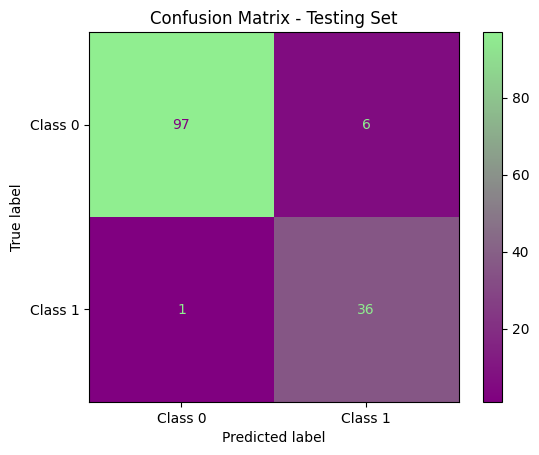

In [254]:
from matplotlib.colors import LinearSegmentedColormap

custom_cmap = LinearSegmentedColormap.from_list('custom_cmap', ['purple', 'lightgreen'])
disp_test = ConfusionMatrixDisplay(confusion_matrix=lg_final_confusion, display_labels=['Class 0', 'Class 1'])
disp_test.plot(cmap=custom_cmap)
plt.title('Confusion Matrix - Testing Set')
plt.show()

Decision Tree

In [255]:
dt_pipeline = Pipeline([
    ('smote', smote),
    ('dt', DecisionTreeClassifier())
])

dt_param_grid = {
        'dt__max_depth': [10, 20, 30],
        'dt__min_samples_split': [2, 5, 10],
        'dt__min_samples_leaf': [1, 2, 4]
}

dt_pipeline.fit(X_train_pca,y_train)

dt_y_pred_train = dt_pipeline.predict(X_train_pca)
dt_y_pred_test = dt_pipeline.predict(X_test_pca)

print('Training accuracy score :',accuracy_score(y_train, dt_y_pred_train))
print('Training F1 score:',f1_score(y_train, dt_y_pred_train, average='macro'))


print('Testing accuracy score :',accuracy_score(y_test, dt_y_pred_test))
print('Testing F1 score:',f1_score(y_test, dt_y_pred_test, average='macro'))

Training accuracy score : 1.0
Training F1 score: 1.0
Testing accuracy score : 0.9214285714285714
Testing F1 score: 0.8980874859373966


In [256]:
dt_grid_search = GridSearchCV(dt_pipeline, dt_param_grid, cv=5, scoring='accuracy')
dt_grid_search.fit(X_train_pca,y_train)


print(f"Best Parameters: {dt_grid_search.best_params_}")
print(f"Best Score: {dt_grid_search.best_score_}")

Best Parameters: {'dt__max_depth': 30, 'dt__min_samples_leaf': 4, 'dt__min_samples_split': 10}
Best Score: 0.9334620334620336


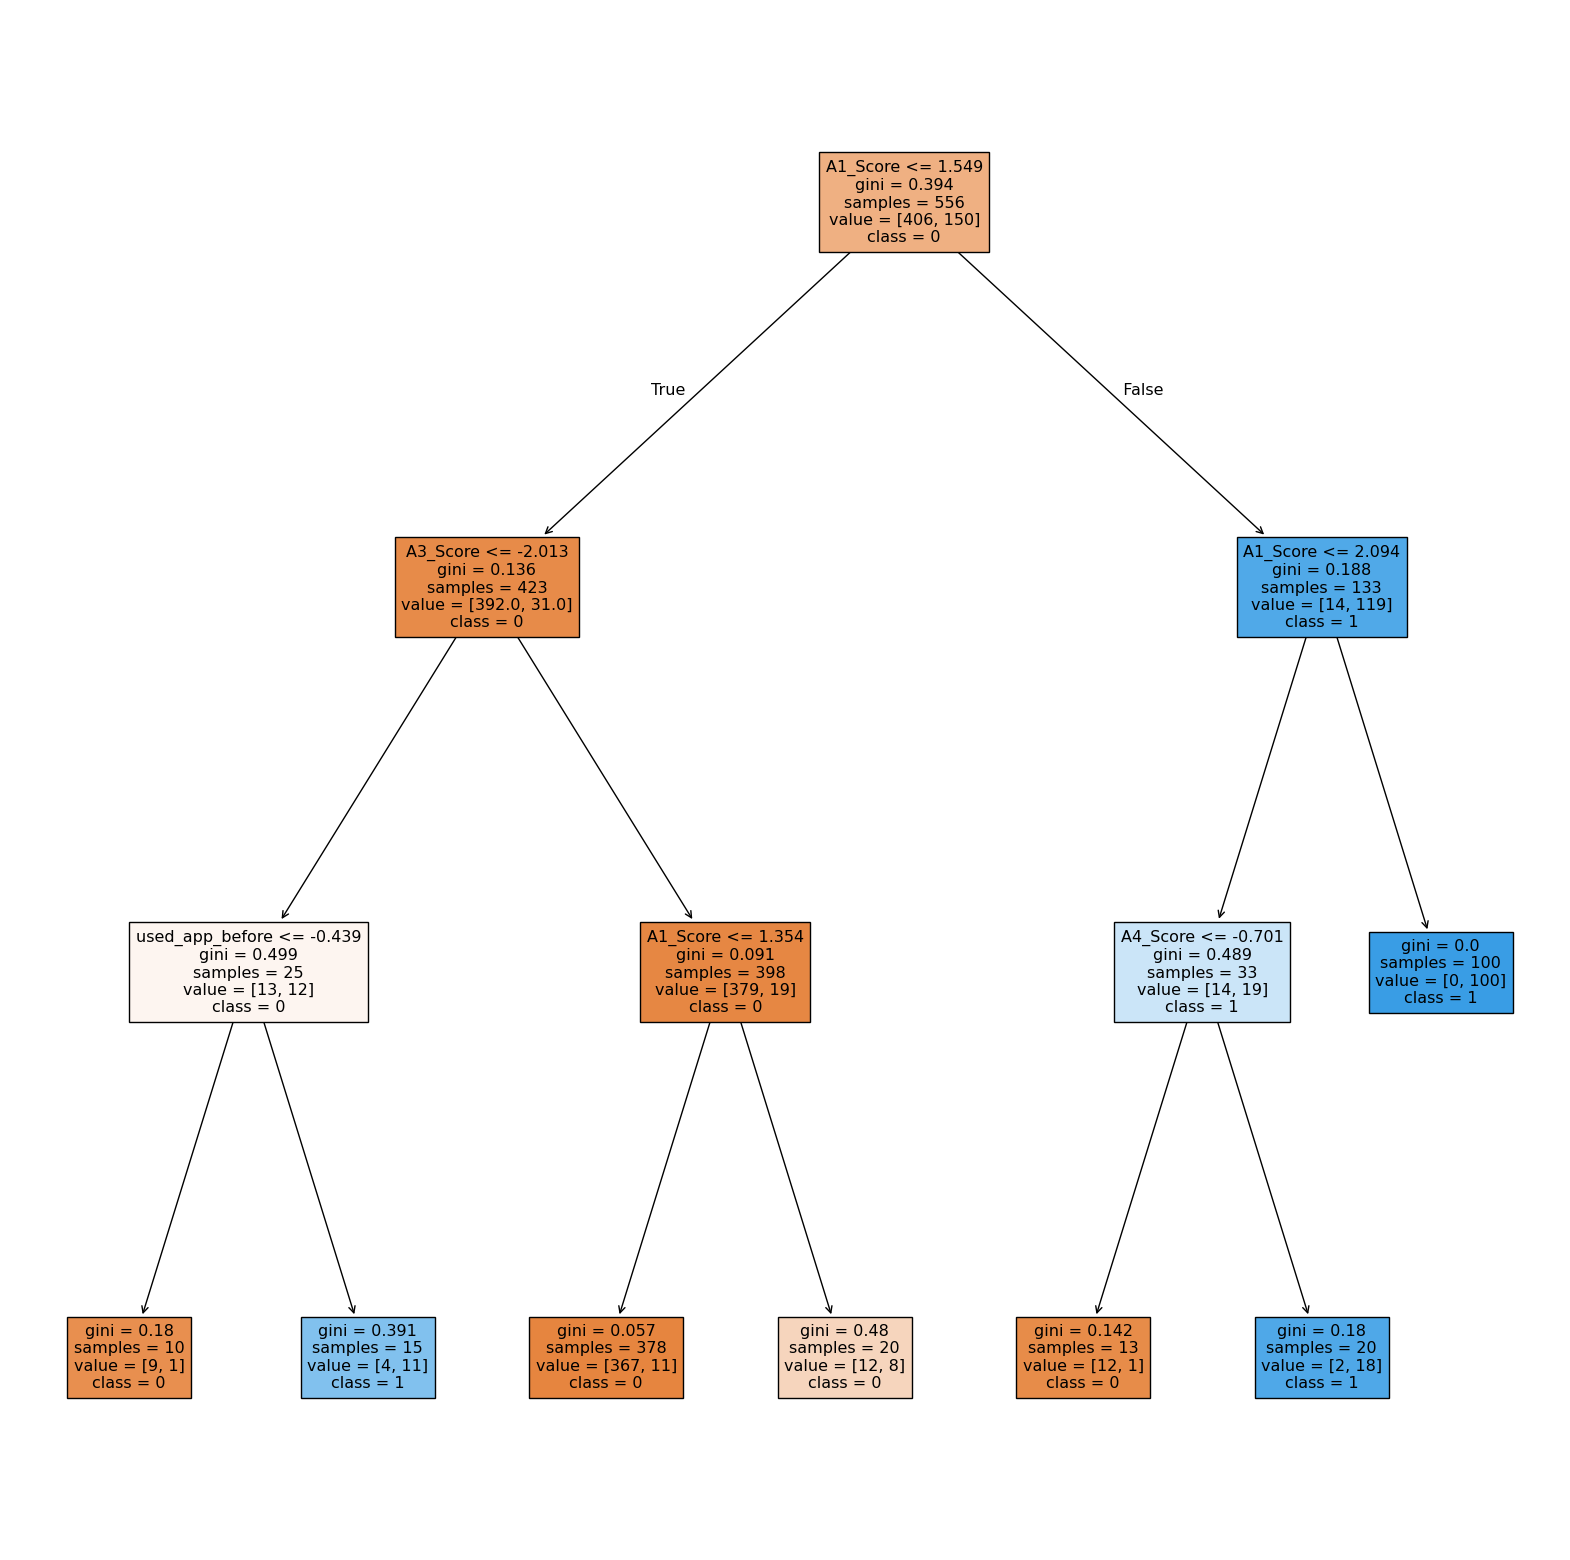

In [257]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

dt_model = DecisionTreeClassifier(max_depth=3)
dt_model.fit(X_train_pca, y_train)

# Convert class names to strings
class_names = list(map(str, dt_model.classes_))

# Plot the decision tree
plt.figure(figsize=(20, 20))
_ = plot_tree(dt_model, 
              feature_names=X_train.columns,  
              class_names=class_names,
              filled=True)
plt.show()

In [258]:
dt_pipeline.set_params(**dt_grid_search.best_params_)
dt_pipeline.fit(X_train_pca, y_train)
dt_y_predict_train = dt_pipeline.predict(X_train_pca)
dt_y_predict_test = dt_pipeline.predict(X_test_pca)

dt_final_train_accuracy = accuracy_score(y_train,dt_y_predict_train)
dt_final_test_accuracy = accuracy_score(y_test, dt_y_predict_test)
dt_final_f1_score = f1_score(y_test, dt_y_predict_test)
dt_auc_score = roc_auc_score(y_test, dt_pipeline.predict_proba(X_test_pca)[:, 1])
dt_final_report = classification_report(y_test, dt_y_predict_test)
dt_final_confusion = confusion_matrix(y_test, dt_y_predict_test)

print(f"Decision Tree Best Training Accuracy: {dt_final_train_accuracy}\n")
print(f"Decision Tree Best Testing Accuracy: {dt_final_test_accuracy}\n")
print(f"F1 score:{dt_final_f1_score}\n")
print(f"ROC AUC score:{dt_auc_score}\n")
print(f"Classification Report:\n{dt_final_report}")
print(f"Confusion Matrix:\n{dt_final_confusion}")

Decision Tree Best Training Accuracy: 0.9838129496402878

Decision Tree Best Testing Accuracy: 0.9214285714285714

F1 score:0.8533333333333334

ROC AUC score:0.9422723694568356

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.95       103
           1       0.84      0.86      0.85        37

    accuracy                           0.92       140
   macro avg       0.90      0.90      0.90       140
weighted avg       0.92      0.92      0.92       140

Confusion Matrix:
[[97  6]
 [ 5 32]]


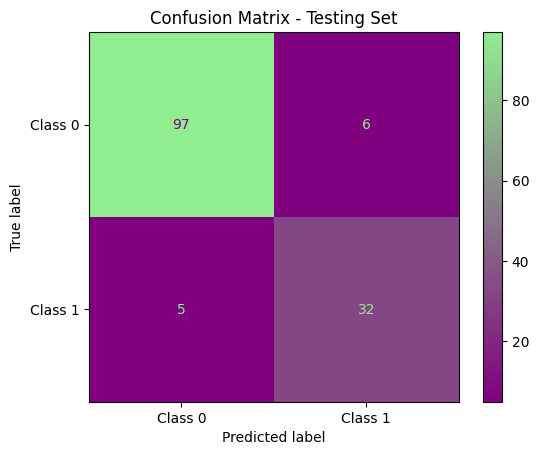

In [259]:

custom_cmap = LinearSegmentedColormap.from_list('custom_cmap', ['purple', 'lightgreen'])
disp_test = ConfusionMatrixDisplay(confusion_matrix=dt_final_confusion, display_labels=['Class 0', 'Class 1'])
disp_test.plot(cmap=custom_cmap)
plt.title('Confusion Matrix - Testing Set')
plt.show()

Random Forest

In [260]:

rf_pipeline = Pipeline([
    ('smote', smote),
    ('rf', RandomForestClassifier())
])

rf_param_grid = {
        'rf__n_estimators': [10, 20, 30],
        'rf__max_depth' : [10, 20, 30]
}

rf_pipeline.fit(X_train_pca,y_train)

rf_y_pred_train = rf_pipeline.predict(X_train_pca)
rf_y_pred_test = rf_pipeline.predict(X_test_pca)

print('Training accuracy score :',accuracy_score(y_train, rf_y_pred_train))
print('Training F1 score:',f1_score(y_train, rf_y_pred_train, average='macro'))


print('Testing accuracy score :',accuracy_score(y_test, rf_y_pred_test))
print('Testing F1 score:',f1_score(y_test, rf_y_pred_test, average='macro'))

Training accuracy score : 1.0
Training F1 score: 1.0
Testing accuracy score : 0.9
Testing F1 score: 0.8735810113519091


In [261]:
rf_grid_search = GridSearchCV(rf_pipeline, rf_param_grid, cv=5, scoring='accuracy')
rf_grid_search.fit(X_train_pca,y_train)


print(f"Best Parameters: {rf_grid_search.best_params_}")
print(f"Best Score: {rf_grid_search.best_score_}")

Best Parameters: {'rf__max_depth': 20, 'rf__n_estimators': 20}
Best Score: 0.9370334620334619


In [262]:
rf_pipeline.set_params(**rf_grid_search.best_params_)
rf_pipeline.fit(X_train_pca, y_train)
rf_y_predict_train = rf_pipeline.predict(X_train_pca)
rf_y_predict_test = rf_pipeline.predict(X_test_pca)

rf_final_train_accuracy = accuracy_score(y_train,rf_y_predict_train)
rf_final_test_accuracy = accuracy_score(y_test, rf_y_predict_test)
rf_final_f1_score = f1_score(y_test, rf_y_predict_test)
rf_auc_score = roc_auc_score(y_test, rf_pipeline.predict_proba(X_test_pca)[:, 1])
rf_final_report = classification_report(y_test, rf_y_predict_test)
rf_final_confusion = confusion_matrix(y_test, rf_y_predict_test)

print(f"Random Forest Best Training Accuracy: {rf_final_train_accuracy}\n")
print(f"Random Forest Best Testing Accuracy: {rf_final_test_accuracy}\n")
print(f"F1 score:{rf_final_f1_score}\n")
print(f"ROC AUC score:{rf_auc_score}\n")
print(f"Classification Report:\n{rf_final_report}")
print(f"Confusion Matrix:\n{rf_final_confusion}")

Random Forest Best Training Accuracy: 1.0

Random Forest Best Testing Accuracy: 0.9

F1 score:0.8157894736842105

ROC AUC score:0.9717921805300446

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       103
           1       0.79      0.84      0.82        37

    accuracy                           0.90       140
   macro avg       0.87      0.88      0.87       140
weighted avg       0.90      0.90      0.90       140

Confusion Matrix:
[[95  8]
 [ 6 31]]


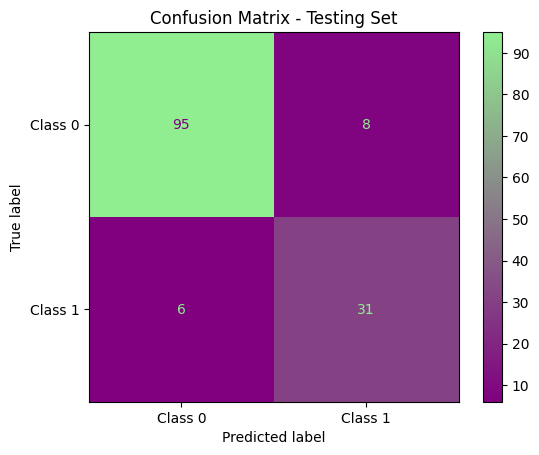

In [263]:
custom_cmap = LinearSegmentedColormap.from_list('custom_cmap', ['purple', 'lightgreen'])
disp_test = ConfusionMatrixDisplay(confusion_matrix=rf_final_confusion, display_labels=['Class 0', 'Class 1'])
disp_test.plot(cmap=custom_cmap)
plt.title('Confusion Matrix - Testing Set')
plt.show()

In [264]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_pca, y_train)

# Predict on the testing set
y_pred_train = rf_model.predict(X_train_pca)
y_pred_test = rf_model.predict(X_test_pca)

# Evaluate the model
accuracy_test = accuracy_score(y_test, y_pred_test)

feature_importances = rf_model.feature_importances_
feature_names = X.columns

print("\nFeature Importances:")
for feature, importance in zip(feature_names, feature_importances):
    print(f"{feature}: {importance}")



Feature Importances:
A1_Score: 0.4454189256186321
A2_Score: 0.10933797940462096
A3_Score: 0.05807721832485892
A4_Score: 0.03658810757698134
A5_Score: 0.033436142689201157
A6_Score: 0.052711410222149147
A7_Score: 0.031439867194563945
A8_Score: 0.02275723376249451
A9_Score: 0.017359306394009198
A10_Score: 0.021470527379308147
age: 0.0166340471106361
gender: 0.01639641605913122
jaundice: 0.016559360075021786
autism: 0.01558254352876172
used_app_before: 0.01586700689685704
ethnicity_Asian: 0.02031942828354679
ethnicity_Black: 0.013241886200555483
ethnicity_Hispanic: 0.01752972837561902
ethnicity_Latino: 0.011413692830580746
ethnicity_Middle Eastern : 0.02785917207247066


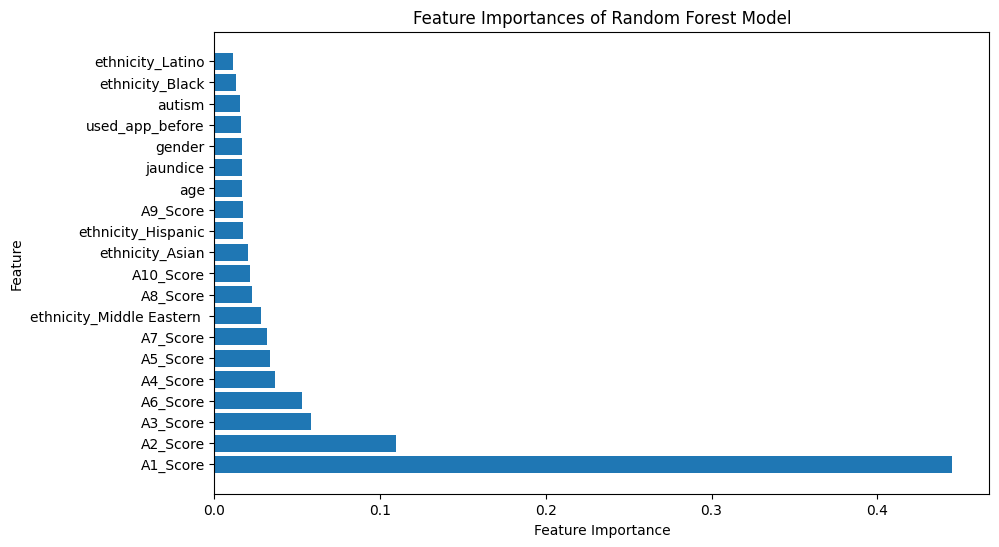

In [265]:
feature_importances = rf_model.feature_importances_
feature_names = X.columns

# Sort feature importances in descending order
sorted_indices = feature_importances.argsort()[::-1]
sorted_feature_importances = feature_importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_feature_importances)), sorted_feature_importances, align='center')
plt.yticks(range(len(sorted_feature_importances)), sorted_feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances of Random Forest Model')
plt.show()

SVC

In [266]:
svc = SVC(probability=True)

svc_pipeline = Pipeline([
    ('smote', smote),
    ('svc', svc)
])

svc_param_grid = {
        'svc__C': [0.1, 1, 10],
        'svc__kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
        'svc__degree': [1, 2, 3],
        'svc__gamma': [0.1, 0.01, 0.001]
}

svc_pipeline.fit(X_train_pca,y_train)

svc_y_pred_train = svc_pipeline.predict(X_train_pca)
svc_y_pred_test = svc_pipeline.predict(X_test_pca)

print('Training accuracy score :',accuracy_score(y_train, svc_y_pred_train))
print('Training F1 score:',f1_score(y_train, svc_y_pred_train, average='macro'))


print('Testing accuracy score :',accuracy_score(y_test, svc_y_pred_test))
print('Testing F1 score:',f1_score(y_test, svc_y_pred_test, average='macro'))

Training accuracy score : 0.9856115107913669
Training F1 score: 0.9819653254188359
Testing accuracy score : 0.9071428571428571
Testing F1 score: 0.8853832105296303


In [267]:
svc_grid_search = GridSearchCV(svc_pipeline, svc_param_grid, cv=5, scoring='accuracy')
svc_grid_search.fit(X_train_pca,y_train)


print(f"Best Parameters: {svc_grid_search.best_params_}")
print(f"Best Score: {svc_grid_search.best_score_}")

Best Parameters: {'svc__C': 10, 'svc__degree': 1, 'svc__gamma': 0.1, 'svc__kernel': 'linear'}
Best Score: 0.9604568854568856


In [268]:
svc_pipeline.set_params(**svc_grid_search.best_params_)
svc_pipeline.fit(X_train_pca, y_train)
svc_y_predict_train = svc_pipeline.predict(X_train_pca)
svc_y_predict_test = svc_pipeline.predict(X_test_pca)

svc_final_train_accuracy = accuracy_score(y_train,svc_y_predict_train)
svc_final_test_accuracy = accuracy_score(y_test, svc_y_predict_test)
svc_final_f1_score = f1_score(y_test, svc_y_predict_test)
svc_auc_score = roc_auc_score(y_test, svc_pipeline.predict_proba(X_test_pca)[:, 1])
svc_final_report = classification_report(y_test, svc_y_predict_test)
svc_final_confusion = confusion_matrix(y_test, svc_y_predict_test)

print(f"SVC Best Training Accuracy: {svc_final_train_accuracy}\n")
print(f"SVC Forest Best Testing Accuracy: {svc_final_test_accuracy}\n")
print(f"F1 score:{svc_final_f1_score}\n")
print(f"ROC AUC score:{svc_auc_score}\n")
print(f"Classification Report:\n{svc_final_report}")
print(f"Confusion Matrix:\n{svc_final_confusion}")

SVC Best Training Accuracy: 0.9856115107913669

SVC Forest Best Testing Accuracy: 0.9714285714285714

F1 score:0.9473684210526315

ROC AUC score:0.9853056940435581

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       103
           1       0.92      0.97      0.95        37

    accuracy                           0.97       140
   macro avg       0.96      0.97      0.96       140
weighted avg       0.97      0.97      0.97       140

Confusion Matrix:
[[100   3]
 [  1  36]]


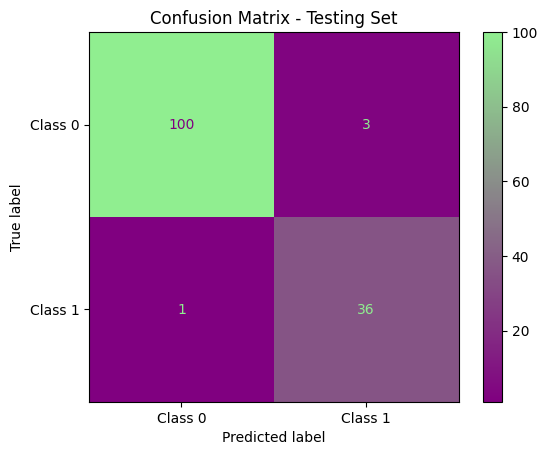

In [269]:
custom_cmap = LinearSegmentedColormap.from_list('custom_cmap', ['purple', 'lightgreen'])
disp_test = ConfusionMatrixDisplay(confusion_matrix=svc_final_confusion, display_labels=['Class 0', 'Class 1'])
disp_test.plot(cmap=custom_cmap)
plt.title('Confusion Matrix - Testing Set')
plt.show()